## Problem Statement

#### Walmart company wants to analyze the customer purchase behavior (specifically, purchase amount) against the customer’s gender, Demography, Geographic etc. to help the business make better decisions. They want to understand if the spending habits differ between male and female customers: Do women spend more on Black Friday than men etc.

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import binom,norm,poisson

In [9]:
df=pd.read_csv("https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/293/original/walmart_data.csv?1641285094")

In [295]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


In [12]:
df.shape

(550068, 10)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  int64 
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  int64 
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  int64 
 8   Product_Category            550068 non-null  int64 
 9   Purchase                    550068 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 42.0+ MB


#### No null/missing values found in any of the columns

In [16]:
df.isnull().sum(axis=0)

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category              0
Purchase                      0
dtype: int64

In [99]:
cols=['Occupation','Marital_Status','Product_Category']
df[cols]=df[cols].astype('object')

In [100]:
df.describe()

,User_ID,Purchase
count,5.500680e+05,550068.000000
mean,1.003029e+06,9263.968713
std,1.727592e+03,5023.065394
min,1.000001e+06,12.000000
25%,1.001516e+06,5823.000000
50%,1.003077e+06,8047.000000
75%,1.004478e+06,12054.000000
max,1.006040e+06,23961.000000


<AxesSubplot:xlabel='Purchase'>

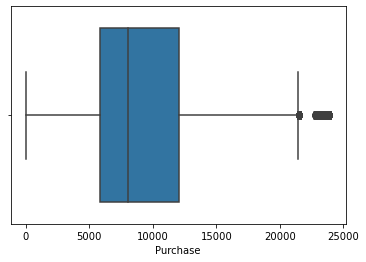

In [102]:
#we can see large difference between mean and median so there are some outliers present in purchase
sns.boxplot(data=df,
           x='Purchase')

In [103]:
p_25 = df["Purchase"].quantile(0.25) # Q1 or p_25
p_50 = df["Purchase"].quantile(0.5)  # Q2 or p_50 or median
p_75 = df["Purchase"].quantile(0.75) # Q3 or p_75
print(p_25, p_50, p_75)

5823.0 8047.0 12054.0


In [104]:
iqr = p_75 - p_25 
lower = max(p_25 - 1.5*iqr, 0)
upper = p_75 + 1.5*iqr
print(lower, upper)
print(iqr)

0 21400.5
6231.0


In [105]:
Purchase_outlier = df[df["Purchase"] > upper]
len(Purchase_outlier)

2677

#### Approx 0.48% outlier are there in purchase

In [121]:
(len(Purchase_outlier) / len(df))*100

0.4866671029763593

<AxesSubplot:xlabel='Purchase', ylabel='Count'>

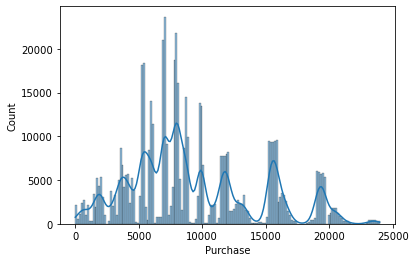

In [151]:
sns.histplot(data=df,
           x='Purchase',kde=True)

<AxesSubplot:ylabel='Density'>

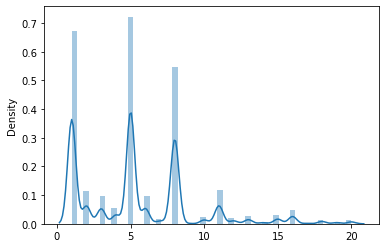

In [159]:
#Product_Category - 1, 5, 8 have highest purchasing frequency.
sns.distplot(x=df['Product_Category'])

<AxesSubplot:xlabel='Marital_Status', ylabel='count'>

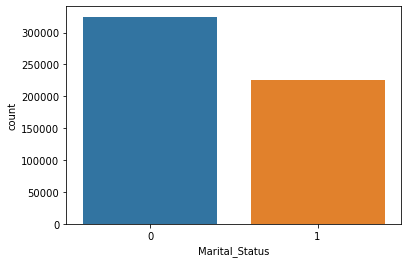

In [168]:
#most of users are type 0 as compared to 1
sns.countplot(x=df['Marital_Status'])

In [122]:
df.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category',
       'Purchase'],
      dtype='object')

In [123]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


In [132]:
#There are 3631 type of product in the dataset
df.Product_ID.nunique()

3631

In [137]:
#20 types of product category present in dataset
df['Product_Category'].nunique()

20

<AxesSubplot:xlabel='Product_Category', ylabel='count'>

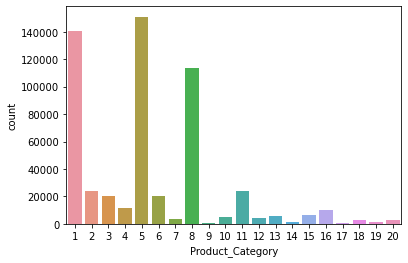

In [416]:
sns.countplot(data=df,
             x='Product_Category')

#### Product_Category - 1, 5, 8 have highest purchasing frequency.

In [143]:
#Most of our customers are from city category B followed by C
df['City_Category'].value_counts(normalize=True)

B    0.420263
C    0.311189
A    0.268549
Name: City_Category, dtype: float64

<AxesSubplot:xlabel='City_Category', ylabel='count'>

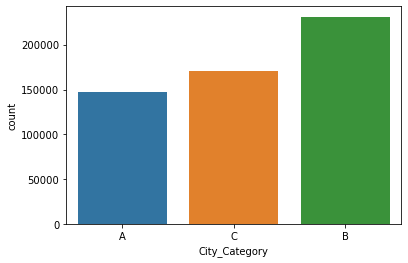

In [417]:
sns.countplot(data=df,
             x='City_Category')

In [147]:
#75% transactions are done by male
#25% transactions are done by female
df.Gender.value_counts(normalize=True)

M    0.753105
F    0.246895
Name: Gender, dtype: float64

In [138]:
#40% customers are of age group 26-35
#20% customers are of age group 36-45
#18% customers are of age group 18-25
df['Age'].value_counts(normalize=True)

26-35    0.399200
36-45    0.199999
18-25    0.181178
46-50    0.083082
51-55    0.069993
55+      0.039093
0-17     0.027455
Name: Age, dtype: float64

<AxesSubplot:xlabel='Age', ylabel='count'>

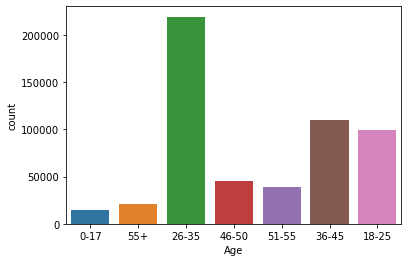

In [418]:
sns.countplot(data=df,
             x='Age')

#### From above countplot we can infer that most of the customers are of age group 26-35

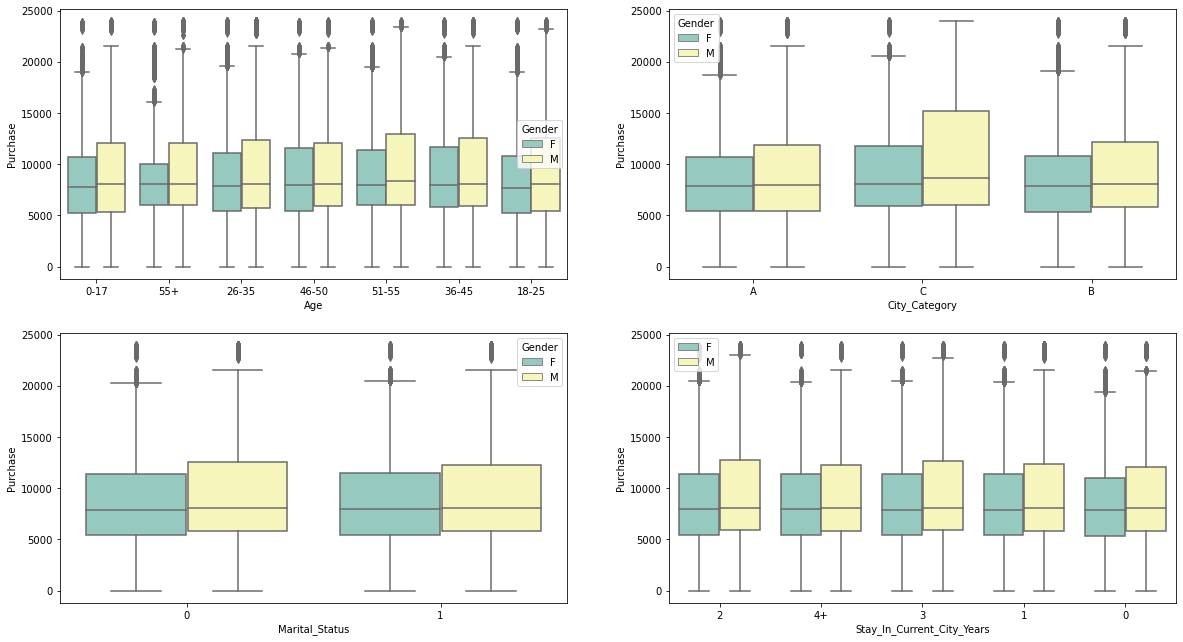

In [424]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(20, 6))
fig.subplots_adjust(top=1.5)
sns.boxplot(data=df, y='Purchase', x='Age', hue='Gender', palette='Set3', ax=axs[0,0])
sns.boxplot(data=df, y='Purchase', x='City_Category', hue='Gender', palette='Set3', ax=axs[0,1])

sns.boxplot(data=df, y='Purchase', x='Marital_Status', hue='Gender', palette='Set3', ax=axs[1,0])
sns.boxplot(data=df, y='Purchase', x='Stay_In_Current_City_Years', hue='Gender', palette='Set3', ax=axs[1,1])
axs[1,1].legend(loc='upper left')

plt.show()

#### from the above boxplot we can infer that male customers in city C has high purchase behaviour so we should focus on that city for male

#### Number of unique males and females

In [165]:
df.groupby('Gender')['User_ID'].nunique()

Gender
F    1666
M    4225
Name: User_ID, dtype: int64

In [169]:
male_uniq=df.groupby('Gender')['User_ID'].nunique()[1]
female_uniq=df.groupby('Gender')['User_ID'].nunique()[0]
male_uniq,female_uniq

(4225, 1666)

In [209]:
#amount spend per customers
avg_df=df.groupby(['User_ID','Gender'])['Purchase'].sum()
avg_df1=avg_df.reset_index()
avg_df1

,User_ID,Gender,Purchase
0,1000001,F,334093
1,1000002,M,810472
2,1000003,M,341635
3,1000004,M,206468
4,1000005,M,821001
...,...,...,...
5886,1006036,F,4116058
5887,1006037,F,1119538
5888,1006038,F,90034
5889,1006039,F,590319


In [211]:
# Gender wise value counts in avg_df1
avg_df1['Gender'].value_counts()

M    4225
F    1666
Name: Gender, dtype: int64

<AxesSubplot:xlabel='Purchase', ylabel='Count'>

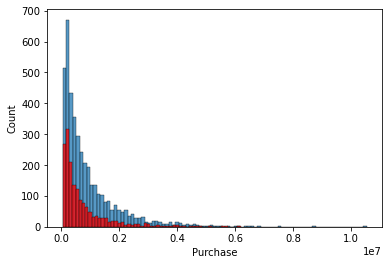

In [264]:
sns.histplot(avg_df1[avg_df1['Gender']=='M']['Purchase'])

sns.histplot(avg_df1[avg_df1['Gender']=='F']['Purchase'],color='r')

#### From the above histplot we can infer that average purchase of Male is higher than Female

#### Average amount spend by Male/Female customers

In [224]:
male_avg = avg_df1[avg_df1['Gender']=='M']['Purchase'].mean()
female_avg = avg_df1[avg_df1['Gender']=='F']['Purchase'].mean()

print("Average amount spend by Male customers:{:.3f}".format(male_avg))
print("Average amount spend by Female customers: {:.3f}".format(female_avg))


Average amount spend by Male customers:925344.402
Average amount spend by Female customers: 712024.395


In [226]:
male_df = avg_df1[avg_df1['Gender']=='M']
female_df = avg_df1[avg_df1['Gender']=='F']

In [247]:
male_sample_size = 3500
female_sample_size = 1300
num_repitions = 1000
male_means = []
female_means = []

for i in range(num_repitions):
    male_mean = male_df['Purchase'].sample(male_sample_size).mean()
    female_mean = female_df.sample(female_sample_size, replace=True)['Purchase'].mean()
    
    male_means.append(male_mean)
    female_means.append(female_mean)

#### Distribution of male means and female means

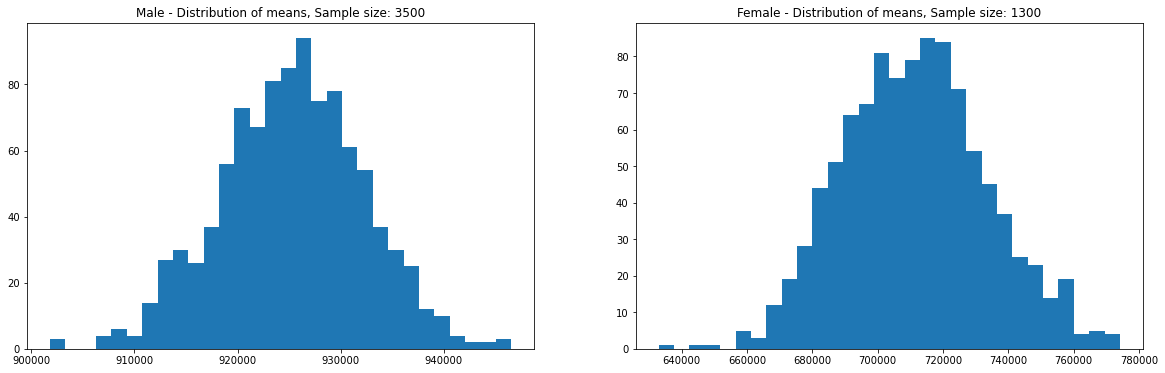

In [426]:
fig, axis = plt.subplots(nrows=1, ncols=2, figsize=(20, 6))

axis[0].hist(male_means, bins=30)
axis[1].hist(female_means, bins=30)
axis[0].set_title("Male - Distribution of means, Sample size: 3500")
axis[1].set_title("Female - Distribution of means, Sample size: 1300")

plt.show()

In [251]:
print("Male - Sample mean: {:.2f}  and Sample std: {:.2f}".format(male_df['Purchase'].mean(), male_df['Purchase'].std()))
print("Female - Sample mean: {:.2f} and Sample std: {:.2f}".format(female_df['Purchase'].mean(), female_df['Purchase'].std()))

Male - Sample mean: 925344.40  and Sample std: 985830.10
Female - Sample mean: 712024.39 and Sample std: 807370.73


### Observation Male vs Female

#### Average amount spend by male customer will lie  between: (895617.83, 955070.97) with 95% confidence

#### Average amount spend by female customer will lie  between: (673254.77, 750794.02) with 95% confidence

#### confidence interval with 95% confidence

In [252]:
male_margin_of_error_clt = 1.96*male_df['Purchase'].std()/np.sqrt(len(male_df))
male_sample_mean = male_df['Purchase'].mean()
male_lower_lim = male_sample_mean - male_margin_of_error_clt
male_upper_lim = male_sample_mean + male_margin_of_error_clt

female_margin_of_error_clt = 1.96*female_df['Purchase'].std()/np.sqrt(len(female_df))
female_sample_mean = female_df['Purchase'].mean()
female_lower_lim = female_sample_mean - female_margin_of_error_clt
female_upper_lim = female_sample_mean + female_margin_of_error_clt

print("Male confidence interval of means: ({:.2f}, {:.2f})".format(male_lower_lim, male_upper_lim))
print("Female confidence interval of means: ({:.2f}, {:.2f})".format(female_lower_lim, female_upper_lim))

Male confidence interval of means: (895617.83, 955070.97)
Female confidence interval of means: (673254.77, 750794.02)


### overlapping?

#### From the above observation we cannot see any overlapping between the intervals of Male and Female hence conclude that the male average amount spent is higher than Female average amount spent with 95 % confidence

#### Average amount spend by married/unmarried customers

In [255]:
#amount spend per customers
avg_df3=df.groupby(['User_ID','Marital_Status'])['Purchase'].sum()
avg_df4=avg_df3.reset_index()
avg_df4

,User_ID,Marital_Status,Purchase
0,1000001,0,334093
1,1000002,0,810472
2,1000003,0,341635
3,1000004,1,206468
4,1000005,1,821001
...,...,...,...
5886,1006036,1,4116058
5887,1006037,0,1119538
5888,1006038,0,90034
5889,1006039,1,590319


In [265]:
#0 indictaes unmarried
#1 indicates married
avg_df4['Marital_Status'].value_counts()

0    3417
1    2474
Name: Marital_Status, dtype: int64

<AxesSubplot:xlabel='Purchase', ylabel='Count'>

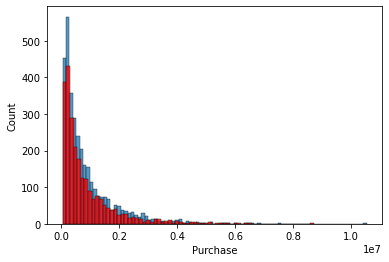

In [268]:
sns.histplot(avg_df4[avg_df4['Marital_Status']==0]['Purchase'])

sns.histplot(avg_df4[avg_df4['Marital_Status']==1]['Purchase'],color='r')

#### From the above histplot we can infer that average purchase of unmarried customers is slightily higher than married customer

In [298]:
mar_samp_size = 3000
unmar_sample_size = 2000
num_repitions = 1000
mar_means = []
unmar_means = []

for i in range(num_repitions):
    mar_mean = avg_df4[avg_df4['Marital_Status']==1]['Purchase'].sample(mar_samp_size, replace=True).mean()
    unmar_mean = avg_df4[avg_df4['Marital_Status']==0].sample(unmar_sample_size, replace=True)['Purchase'].mean()
    
    mar_means.append(mar_mean)
    unmar_means.append(unmar_mean)

#### Distribution of purchase means of married and unmarried

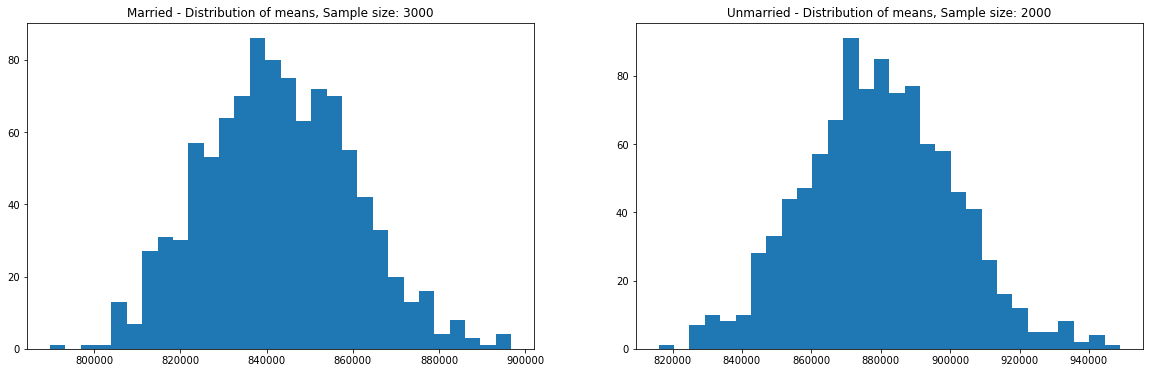

Population mean - Mean of sample means of amount spend for Married: 843720.40
Population mean - Mean of sample means of amount spend for Unmarried: 880746.95

Married - Sample mean: 843526.80 Sample std: 935352.12
Unmarried - Sample mean: 880575.78 Sample std: 949436.25


In [300]:
fig, axis = plt.subplots(nrows=1, ncols=2, figsize=(20, 6))

axis[0].hist(mar_means, bins=30)
axis[1].hist(unmar_means, bins=30)
axis[0].set_title("Married - Distribution of means, Sample size: 3000")
axis[1].set_title("Unmarried - Distribution of means, Sample size: 2000")

plt.show()

print("Population mean - Mean of sample means of amount spend for Married: {:.2f}".format(np.mean(marid_means)))
print("Population mean - Mean of sample means of amount spend for Unmarried: {:.2f}".format(np.mean(unmarid_means)))

print("\nMarried - Sample mean: {:.2f} Sample std: {:.2f}".format(avg_df4[avg_df4['Marital_Status']==1]['Purchase'].mean(), avg_df4[avg_df4['Marital_Status']==1]['Purchase'].std()))
print("Unmarried - Sample mean: {:.2f} Sample std: {:.2f}".format(avg_df4[avg_df4['Marital_Status']==0]['Purchase'].mean(), avg_df4[avg_df4['Marital_Status']==0]['Purchase'].std()))

In [285]:
married_df = avg_df4[avg_df4['Marital_Status']==1]
unmarried_df = avg_df4[avg_df4['Marital_Status']==0]

#### Confidence interval with 95% confidence

In [297]:
margin_of_error_clt = 1.96*married_df['Purchase'].std()/np.sqrt(len(married_df))
sample_mean = married_df['Purchase'].mean()
mar_lower_lim = sample_mean - margin_of_error_clt
mar_upper_lim = sample_mean + margin_of_error_clt

margin_of_error_clt = 1.96*unmarried_df['Purchase'].std()/np.sqrt(len(unmarried_df))
sample_mean = unmarried_df['Purchase'].mean()
unmar_lower_lim = sample_mean - margin_of_error_clt
unmar_upper_lim = sample_mean + margin_of_error_clt

print("married confidence interval of means: ({:.2f}, {:.2f})".format(mar_lower_lim, mar_upper_lim))
print("unmarried confidence interval of means: ({:.2f}, {:.2f})".format(unmar_lower_lim, unmar_upper_lim))


married confidence interval of means: (806668.83, 880384.76)
unmarried confidence interval of means: (848741.18, 912410.38)


#### Since Confidence interval is overlapping  for both 95% and 90% confidence we cannot conclude whether married or unmarried purchase average is more or not if we go below 90% confidence it will make no sense

#### Confidence interval with 90% confidence

In [301]:
 margin_of_error_clt = 1.64*married_df['Purchase'].std()/np.sqrt(len(married_df))
sample_mean = married_df['Purchase'].mean()
mar_lower_lim = sample_mean - margin_of_error_clt
mar_upper_lim = sample_mean + margin_of_error_clt

margin_of_error_clt = 1.64*unmarried_df['Purchase'].std()/np.sqrt(len(unmarried_df))
sample_mean = unmarried_df['Purchase'].mean()
unmar_lower_lim = sample_mean - margin_of_error_clt
unmar_upper_lim = sample_mean + margin_of_error_clt

print("married confidence interval of means: ({:.2f}, {:.2f})".format(mar_lower_lim, mar_upper_lim))
print("unmarried confidence interval of means: ({:.2f}, {:.2f})".format(unmar_lower_lim, unmar_upper_lim))

married confidence interval of means: (812686.46, 874367.13)
unmarried confidence interval of means: (853938.67, 907212.90)


In [303]:
df_age=df.groupby(['User_ID','Age'])['Purchase'].sum()
df_age1=df_age.reset_index()
df_age1

,User_ID,Age,Purchase
0,1000001,0-17,334093
1,1000002,55+,810472
2,1000003,26-35,341635
3,1000004,46-50,206468
4,1000005,26-35,821001
...,...,...,...
5886,1006036,26-35,4116058
5887,1006037,46-50,1119538
5888,1006038,55+,90034
5889,1006039,46-50,590319


In [305]:
df_age1['Age'].value_counts()

26-35    2053
36-45    1167
18-25    1069
46-50     531
51-55     481
55+       372
0-17      218
Name: Age, dtype: int64

#### Most of the customer lie between 26-35 followed by 36-45

<AxesSubplot:xlabel='Age', ylabel='count'>

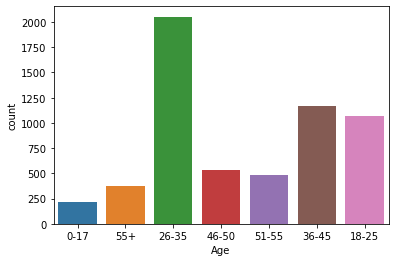

In [351]:
sns.countplot(x=df_age1['Age'])

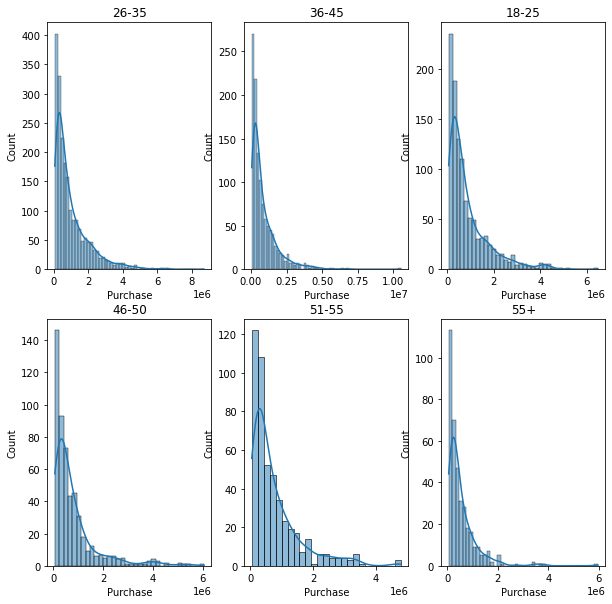

Text(0.5, 1.0, '0-17')

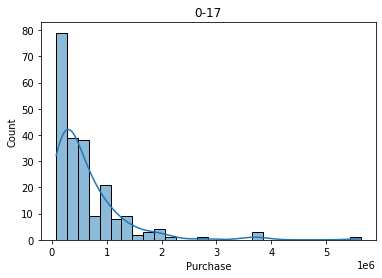

In [336]:
plt.figure(figsize=(10,10))
plt.subplot(2,3,1)
plt.title('26-35')
sns.histplot(df_age1[df_age1['Age']=='26-35']['Purchase'],kde=True)
plt.subplot(2,3,2)
plt.title('36-45')
sns.histplot(df_age1[df_age1['Age']=='36-45']['Purchase'],kde=True)
plt.subplot(2,3,3)
plt.title('18-25')
sns.histplot(df_age1[df_age1['Age']=='18-25']['Purchase'],kde=True)
plt.subplot(2,3,4)
plt.title('46-50')
sns.histplot(df_age1[df_age1['Age']=='46-50']['Purchase'],kde=True)
plt.subplot(2,3,5)
plt.title('51-55')
sns.histplot(df_age1[df_age1['Age']=='51-55']['Purchase'],kde=True)
plt.subplot(2,3,6)
plt.title('55+')
sns.histplot(df_age1[df_age1['Age']=='55+']['Purchase'],kde=True)
plt.show()

sns.histplot(df_age1[df_age1['Age']=='0-17']['Purchase'],kde=True)
plt.title('0-17')



#### from the above histplots we can infer that purchase behaviour of age group between 26-35 is higher than any other age group

In [346]:
age=['26-35','36-45', '18-25', '46-50', '51-55', '55+', '0-17' ]
for i in age:
    print("average purchase {}: {:.2f} ".format(i,df_age1[df_age1['Age']==i]['Purchase'].mean()))


average purchase 26-35: 989659.32 
average purchase 36-45: 879665.71 
average purchase 18-25: 854863.12 
average purchase 46-50: 792548.78 
average purchase 51-55: 763200.92 
average purchase 55+: 539697.24 
average purchase 0-17: 618867.81 


In [405]:
sample_size_26_35 = 2000
sample_size_36_45 = 1000
sample_size_18_25 = 1000
sample_size_46_50 = 500
sample_size_51_55 = 400
sample_size_55abv = 300
sample_size_0_17 = 200
num_repitions = 1000
means_26_35 = []
means_36_45 = []
means_18_25 = []
means_46_50 = []
means_51_55 = []
means_55abv = []
means_0_17 = []


In [406]:
for i in range(num_repitions):
    mean_26_35= df_age1[df_age1['Age']=='26-35']['Purchase'].sample(sample_size_26_35, replace=True).mean()
    mean_36_45= df_age1[df_age1['Age']=='36-45']['Purchase'].sample(sample_size_36_45, replace=True).mean()
    mean_18_25= df_age1[df_age1['Age']=='18-25']['Purchase'].sample(sample_size_18_25, replace=True).mean()
    mean_46_50= df_age1[df_age1['Age']=='46-50']['Purchase'].sample(sample_size_46_50, replace=True).mean()
    mean_51_55= df_age1[df_age1['Age']=='51-55']['Purchase'].sample(sample_size_51_55, replace=True).mean()
    mean_55abv= df_age1[df_age1['Age']=='55+']['Purchase'].sample(sample_size_55abv, replace=True).mean()
    mean_0_17= df_age1[df_age1['Age']=='0-17']['Purchase'].sample(sample_size_0_17, replace=True).mean()
    
    
    
    means_26_35.append(mean_26_35)
    means_36_45.append(mean_36_45)
    means_18_25.append(mean_18_25)
    means_46_50.append(mean_46_50)
    means_51_55.append(mean_51_55)
    means_55abv.append(mean_55abv)
    means_0_17.append(mean_0_17)
    

#### Distribution of means of Age category

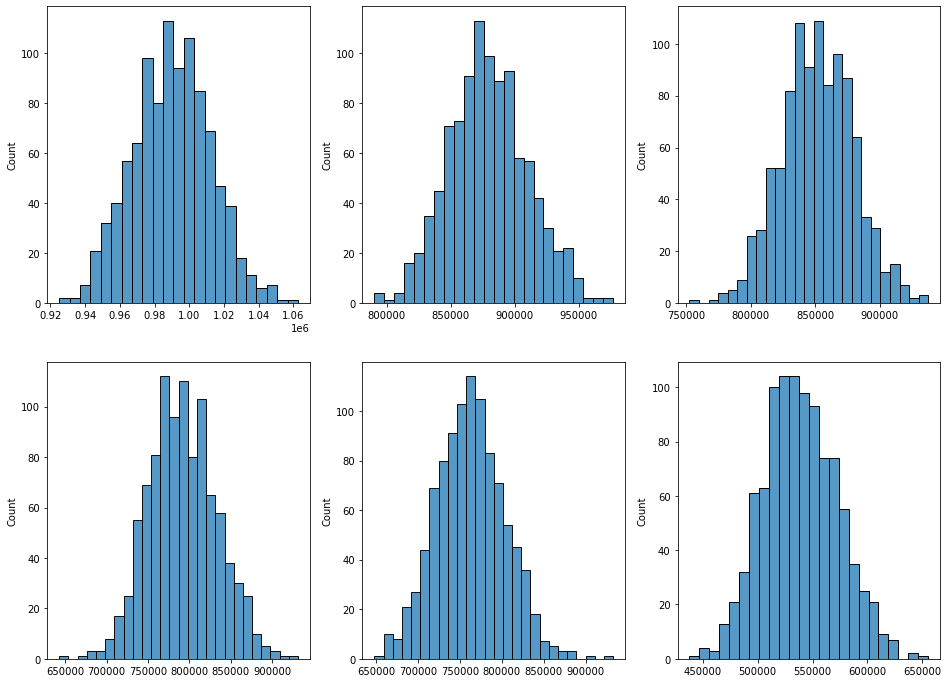

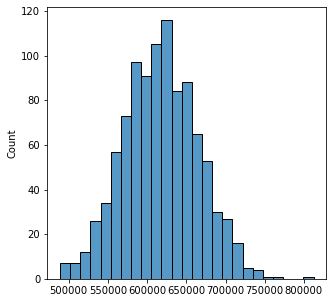

In [415]:
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(16, 12))
sns.histplot(means_26_35,ax=axs[0,0])
sns.histplot(means_36_45,ax=axs[0,1])
sns.histplot(means_18_25,ax=axs[0,2])
sns.histplot(means_46_50,ax=axs[1,0])
sns.histplot(means_51_55,ax=axs[1,1])
sns.histplot(means_55abv,ax=axs[1,2])
plt.show()

plt.figure(figsize=(5, 5))
sns.histplot(means_0_17)
plt.show()

In [396]:
for val in ['26-35', '36-45', '18-25', '46-50', '51-55', '55+', '0-17']:
    
    new_df = df_age1[df_age1['Age']==val] 
    
    margin_of_error_clt = 1.96*new_df['Purchase'].std()/np.sqrt(len(new_df))
    sample_mean = new_df['Purchase'].mean()
    lower_lim = sample_mean - margin_of_error_clt
    upper_lim = sample_mean + margin_of_error_clt

    print("For age {} --> confidence interval of means: ({:.2f}, {:.2f})".format(val, lower_lim, upper_lim))

For age 26-35 --> confidence interval of means: (945034.42, 1034284.21)
For age 36-45 --> confidence interval of means: (823347.80, 935983.62)
For age 18-25 --> confidence interval of means: (801632.78, 908093.46)
For age 46-50 --> confidence interval of means: (713505.63, 871591.93)
For age 51-55 --> confidence interval of means: (692392.43, 834009.42)
For age 55+ --> confidence interval of means: (476948.26, 602446.23)
For age 0-17 --> confidence interval of means: (527662.46, 710073.17)


#### Above outputs state the confidence interval of Ages with 95% confidence

#### The customer between age 26 to 35 has highest average purchase

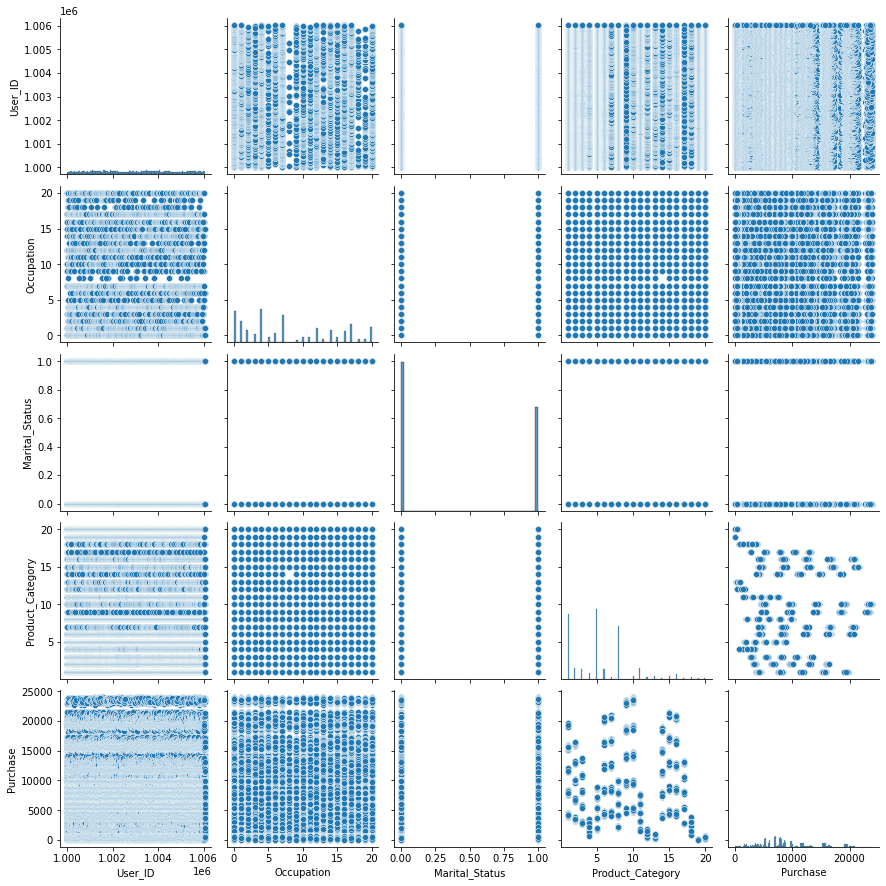

In [425]:
sns.pairplot(data=df)

In [399]:
cols=['Occupation','Marital_Status','Product_Category']
df[cols]=df[cols].astype('int')

<AxesSubplot:>

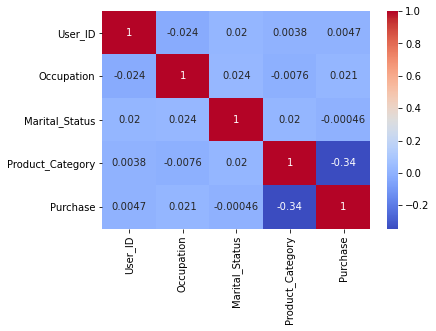

In [400]:
sns.heatmap(df.corr(),annot=True,cmap="coolwarm")

#### Heatmaps states 2% correlation between purchase and occupation

## Business Insights

#### 75% transactions are done by male and 25% transactions are done by female

#### Product_Category - 1, 5, 8 have highest purchasing frequency.

#### most of users are have martial status 0 as compared to 1

#### Most of our customers are from city category B followed by C

#### Average amount spend by male customer will lie  between: (895617.83, 955070.97) with 95% confidence

#### Average amount spend by female customer will lie  between: (673254.77, 750794.02) with 95% confidence

#### married confidence interval of means: (806668.83, 880384.76) with 95% confidence

#### unmarried confidence interval of means: (853938.67, 907212.90) with 95% confidence

#### married confidence interval of means: (812686.46, 874367.13) with 90% confidence

#### unmarried confidence interval of means: (853938.67, 907212.90)

#### purchase behaviour of age group between 26-35 is higher than any other age group

#### For age 26-35 --> confidence interval of means: (945034.42, 1034284.21) with 95% confidence

#### For age 36-45 --> confidence interval of means: (823347.80, 935983.62) with 95% confidence

#### For age 18-25 --> confidence interval of means: (801632.78, 908093.46) with 95% confidence

#### For age 46-50 --> confidence interval of means: (713505.63, 871591.93) with 95% confidence

#### For age 51-55 --> confidence interval of means: (692392.43, 834009.42) with 95% confidence

#### For age 55+ --> confidence interval of means: (476948.26, 602446.23) with 95% confidence

#### For age 0-17 --> confidence interval of means: (527662.46, 710073.17) with 95% confidence

## Recommendations

#### Male customer spend more than Female customers so company should focus more on male customers than female

#### Product_category 1,5,8 has highest purchasing frequency so, we should maintain the stock of these product category  

#### customers at the age group of 26-35 have the highest purchase mean so company should try to retain this age group customers

#### Unmarried customers tend to purchase more than married customers so we give some promotional offer to married so that our sales can increase  this inference are from histogram

#### Our target customer is  unmarried male person within the age of 26 -35 . we can offer some discount to target customers so that our sales can boom

#### we infer that male customers in city C has high purchase behaviour so we should focus on that city for male to increse revenue